In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [12]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=9fb4456765e0f9645f78f7286ae14536&units=metric&q=


In [20]:
lats = []
lngs = []
city_list = []
country = []

max_temp = []
humid = []
clouds = []
wind = []

date = []

#weather check on each city using API calls
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        time.sleep(1)
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        city_list.append(response['name'])
        country.append(response['sys']['country'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
    except(KeyError):
        print("City not found")

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


In [21]:
weather_info_df = pd.DataFrame({"Latitude":lats,
                                "Longitude":lngs,
                                "City":city_list,
                                "Country":country,
                                "Max Temp.":max_temp,
                                "Humidity":humid,
                                "Cloudiness":clouds,
                                "Windiness":wind,
                                "Date":date})
weather_info_df.head()

,Latitude,Longitude,City,Country,Max Temp.,Humidity,Cloudiness,Windiness,Date
0,-46.1927,168.8643,Mataura,NZ,25.38,34,0,0.14,1610424683
1,77.4840,-69.3632,Qaanaaq,GL,-16.00,74,4,3.21,1610424685
2,-34.4187,19.2345,Hermanus,ZA,20.56,89,88,3.13,1610424686
3,65.5833,-171.0000,Lavrentiya,RU,-24.47,83,95,4.63,1610424688
4,50.5834,-113.8687,High River,CA,0.00,60,100,7.57,1610424689


In [30]:
lat_mean = weather_info_df["Latitude"].mean()
lng_mean = weather_info_df["Longitude"].mean()
temp_mean = weather_info_df["Max Temp."].mean()
humid_mean = weather_info_df["Humidity"].mean()
clouds_mean = weather_info_df["Cloudiness"].mean()
wind_mean = weather_info_df["Windiness"].mean()
date_mean = weather_info_df["Date"].mean()

mean_weather_df = pd.DataFrame({"Latitude":lat_mean,
                                "Longitude":lng_mean,
                                "Max Temp.":temp_mean,
                                "Humidity":humid_mean,
                                "Cloudiness":clouds_mean,
                                "Windiness":wind_mean,
                                "Date":date_mean}, index=[0])
# weather_mean_df.head()
mean_weather_new_df = mean_weather_df.rename(index={0: 'Mean'})
mean_weather_new_df

,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Windiness,Date
Mean,22.165569,19.361131,8.073145,74.787273,53.456364,3.857909,1.610425e+09


In [36]:
mean_weather_new_transposed = mean_weather_new_df.T
mean_weather_new_transposed

,Mean
Latitude,2.216557e+01
Longitude,1.936113e+01
Max Temp.,8.073145e+00
Humidity,7.478727e+01
Cloudiness,5.345636e+01
Windiness,3.857909e+00
Date,1.610425e+09


In [32]:
lat_count = weather_info_df["Latitude"].count()
lng_count = weather_info_df["Longitude"].count()
temp_count = weather_info_df["Max Temp."].count()
humid_count = weather_info_df["Humidity"].count()
clouds_count = weather_info_df["Cloudiness"].count()
wind_count = weather_info_df["Windiness"].count()
date_count = weather_info_df["Date"].count()

count_weather_df = pd.DataFrame({"Latitude":lat_count,
                                "Longitude":lng_count,
                                "Max Temp.":temp_count,
                                "Humidity":humid_count,
                                "Cloudiness":clouds_count,
                                "Windiness":wind_count,
                                "Date":date_count}, index=[0])
# weather_mean_df.head()
count_weather_new_df = count_weather_df.rename(index={0: 'Count'})
count_weather_new_df

,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Windiness,Date
Count,550,550,550,550,550,550,550


In [35]:
count_weather_new_transposed = count_weather_new_df.T
count_weather_new_transposed

,Count
Latitude,550
Longitude,550
Max Temp.,550
Humidity,550
Cloudiness,550
Windiness,550
Date,550


In [40]:
mean_weather_new_transposed.merge(count_weather_new_transposed, how='left', on=[0])

KeyError: 0

In [65]:
humid_list = list(weather_info_df['Humidity'])
humid_list

[34,
 74,
 89,
 83,
 60,
 56,
 55,
 83,
 73,
 77,
 81,
 77,
 87,
 75,
 43,
 65,
 71,
 85,
 36,
 94,
 80,
 70,
 97,
 94,
 72,
 100,
 86,
 86,
 38,
 93,
 93,
 32,
 74,
 94,
 74,
 75,
 86,
 94,
 84,
 81,
 52,
 85,
 97,
 75,
 95,
 76,
 55,
 88,
 92,
 83,
 42,
 26,
 72,
 26,
 79,
 75,
 48,
 74,
 79,
 100,
 61,
 87,
 93,
 71,
 82,
 94,
 62,
 89,
 73,
 78,
 44,
 69,
 81,
 94,
 97,
 85,
 11,
 93,
 73,
 84,
 85,
 76,
 45,
 78,
 94,
 74,
 93,
 69,
 76,
 88,
 97,
 76,
 77,
 43,
 78,
 81,
 85,
 98,
 79,
 88,
 88,
 70,
 86,
 80,
 85,
 79,
 79,
 95,
 97,
 73,
 72,
 57,
 61,
 82,
 88,
 68,
 84,
 28,
 92,
 91,
 92,
 84,
 85,
 82,
 73,
 52,
 84,
 55,
 76,
 61,
 86,
 66,
 69,
 94,
 70,
 87,
 85,
 84,
 63,
 82,
 94,
 73,
 83,
 93,
 88,
 88,
 74,
 76,
 90,
 58,
 73,
 72,
 52,
 93,
 80,
 83,
 86,
 74,
 21,
 75,
 93,
 74,
 49,
 73,
 85,
 60,
 80,
 93,
 82,
 44,
 93,
 100,
 85,
 21,
 100,
 70,
 42,
 58,
 82,
 76,
 24,
 95,
 79,
 87,
 100,
 70,
 80,
 58,
 58,
 73,
 41,
 65,
 68,
 86,
 97,
 70,
 81,
 100,
 65,

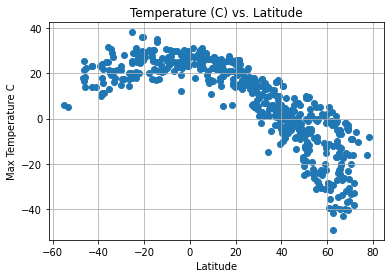

In [74]:
plt.scatter(weather_info_df['Latitude'], weather_info_df['Max Temp.'])

#set labels and add grid
plt.title("Temperature (C) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid()

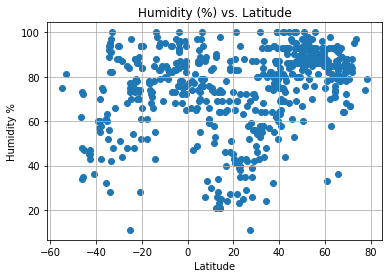

In [77]:
plt.scatter(weather_info_df['Latitude'], weather_info_df['Humidity'])

#set labels and add grid
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

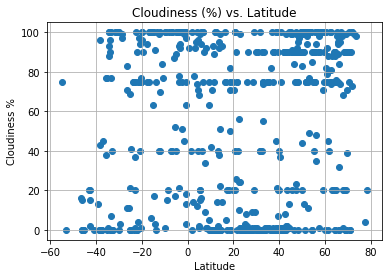

In [80]:
plt.scatter(weather_info_df['Latitude'], weather_info_df['Cloudiness'])

#set labels and add grid
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

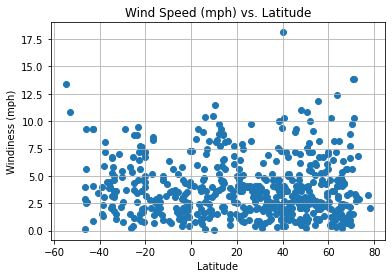

In [81]:
plt.scatter(weather_info_df['Latitude'], weather_info_df['Windiness'])

#set labels and add grid
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windiness (mph)")
plt.grid()


Northern Hemisphere

In [82]:
northern_hem = weather_info_df.loc[weather_info_df['Latitude'] > 0]
northern_hem

,Latitude,Longitude,City,Country,Max Temp.,Humidity,Cloudiness,Windiness,Date
1,77.4840,-69.3632,Qaanaaq,GL,-16.00,74,4,3.21,1610424685
3,65.5833,-171.0000,Lavrentiya,RU,-24.47,83,95,4.63,1610424688
4,50.5834,-113.8687,High River,CA,0.00,60,100,7.57,1610424689
6,37.5683,126.9778,Seoul,KR,1.00,55,0,4.12,1610424519
7,70.6333,147.9167,Chokurdakh,RU,-33.22,83,100,1.48,1610424693
...,...,...,...,...,...,...,...,...,...
543,40.5153,-107.5464,Craig,US,-10.00,84,1,1.70,1610425375
544,39.6333,118.1833,Tangshan,CN,-3.33,76,0,3.73,1610425276
546,47.1687,-1.4693,Vertou,FR,7.00,93,90,4.63,1610425379
548,46.6166,10.7002,Laas,IT,-8.00,53,0,2.57,1610425381


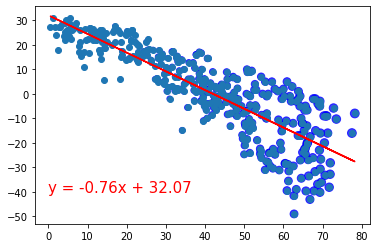

In [116]:
xNLatTemp = np.array(northern_hem['Latitude'])
yNLatTemp = np.array(northern_hem['Max Temp.'])

plt.scatter(xNLatTemp, yNLatTemp, marker="o", facecolors="blue",
            s=x, alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNLatTemp, yNLatTemp)

regress_values = xNLatTemp * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xNLatTemp,yNLatTemp)

plt.plot(xNLatTemp,regress_values,"r-")

plt.annotate(line_eq,(0,-40),fontsize=15,color="red")

plt.show()

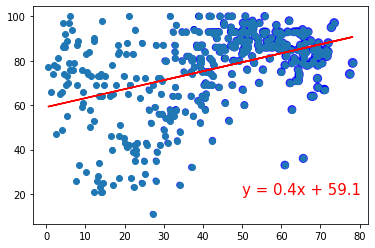

In [120]:
xNLatHumid = np.array(northern_hem['Latitude'])
yNLatHumid = np.array(northern_hem['Humidity'])

plt.scatter(xNLatHumid, yNLatHumid, marker="o", facecolors="blue",
            s=x, alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNLatHumid, yNLatHumid)

regress_values = xNLatHumid * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xNLatHumid,yNLatHumid)

plt.plot(xNLatHumid,regress_values,"r-")

plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.show()

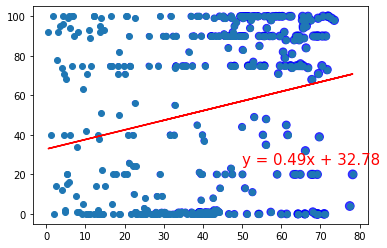

In [122]:
xNLatCloud = np.array(northern_hem['Latitude'])
yNLatCloud = np.array(northern_hem['Cloudiness'])

plt.scatter(xNLatCloud, yNLatCloud, marker="o", facecolors="blue",
            s=x, alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNLatCloud, yNLatCloud)

regress_values = xNLatCloud * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xNLatCloud,yNLatCloud)

plt.plot(xNLatCloud,regress_values,"r-")

plt.annotate(line_eq,(50,25),fontsize=15,color="red")

plt.show()

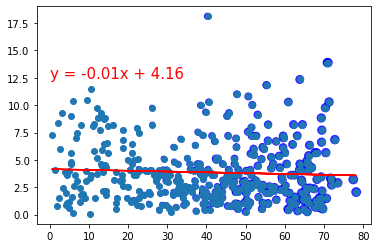

In [124]:
xNLatWind = np.array(northern_hem['Latitude'])
yNLatWind = np.array(northern_hem['Windiness'])

plt.scatter(xNLatWind, yNLatWind, marker="o", facecolors="blue",
            s=x, alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNLatWind, yNLatWind)

regress_values = xNLatWind * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xNLatWind,yNLatWind)

plt.plot(xNLatWind,regress_values,"r-")

plt.annotate(line_eq,(0,12.5),fontsize=15,color="red")

plt.show()

Southern Hemisphere

In [128]:
southern_hem = weather_info_df.loc[weather_info_df['Latitude'] < 0]
southern_hem

,Latitude,Longitude,City,Country,Max Temp.,Humidity,Cloudiness,Windiness,Date
0,-46.1927,168.8643,Mataura,NZ,25.38,34,0,0.14,1610424683
2,-34.4187,19.2345,Hermanus,ZA,20.56,89,88,3.13,1610424686
5,-34.5833,150.8552,Flinders,AU,30.56,56,100,2.24,1610424690
9,-16.4096,-67.5263,Chulumani,BO,17.30,77,100,0.65,1610424697
13,-54.8000,-68.3000,Ushuaia,AR,6.00,75,75,13.38,1610424702
...,...,...,...,...,...,...,...,...,...
538,-5.2269,-75.6753,Lagunas,PE,22.74,97,100,1.02,1610425370
540,-21.3393,55.4781,Saint-Pierre,RE,29.00,74,75,3.60,1610425372
542,-3.4320,10.6554,Mayumba,GA,25.39,87,92,4.66,1610425374
545,-3.9931,-79.2042,Loja,EC,12.22,93,21,0.98,1610425378
